Runge-Kutta 4° Orden
-Herrrera Monteza

La ecuación a resolver es:
$$\dfrac{dv}{dt}= g-kv$$

las condiciones iniciales son $v_{(t=0)}=0$, $k = 1.5, 2, 3$ y solución exacta es $\frac{g}{k}(1-e^{-kt})$

In [192]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) 

In [193]:
# definimos una función:
def vel(g,k,v):
    return g-k*v

In [194]:
def runge_kutta(funcion, g, k, vo, v = None):
    if v is None:
        v = vo
    h = 0.1
    tiempo = np.arange(0,10,h)
    for i in range(len(tiempo)-1):
        k1 = h*funcion(g,k,v[i])
        k2 = h*funcion(g,k,v[i]+k1/2)
        k3 = h*funcion(g,k,v[i]+k2/2)
        k4 = h*funcion(g,k,v[i]+k3)
        v.append(v[i] + (k1+2*k2+2*k3+k4)/6)
    return v

In [195]:
h = 0.1
tiempo = np.arange(0,10,h)

In [196]:
g = runge_kutta(vel, 9.8, 1.5, [0])

la solución exacta:


In [197]:
def solucion_exacta(g,k, sol=None):
    if sol is None:
        sol = []
    h = 0.1
    tiempo = np.arange(0,10,h)
    for t in tiempo:
        sol.append((1-np.exp(-k*t))*(g/k))
    return sol

In [198]:
exac = solucion_exacta(9.8,1.5)

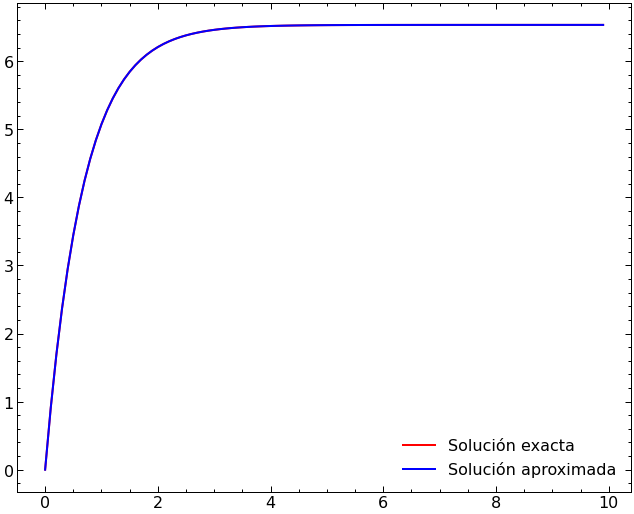

In [199]:
aex = plt.figure(figsize=(11,9))
plt.plot(tiempo, exac, 'r', label='Solución exacta')
plt.plot(tiempo, g, 'b', label='Solución aproximada')
plt.legend()

Para sistemas:

In [200]:
def funcion_f(uu, vv):
    u = -3*uu+2*vv
    v = 3*uu-4*vv
    return u, v # Retorna los valores

In [201]:
def runge_kutta_sistema(funcion, uo, vo, u = None, v = None):
    if v is None:
        v = [vo]
    if u is None:
        u = [uo]
    h = 0.2
    tiempo = np.arange(0,4,h)
    for i in range(len(tiempo)-1):
        k11, k21 = funcion(u[i],v[i])
        k12, k22 = funcion(u[i]+k11/2,v[i]+k21/2)
        k13, k23 = funcion(u[i]+k12/2,v[i]+k22/2)
        k14, k24 = funcion(u[i]+k13,v[i]+k23)
        u.append(u[i] + (k11+2*k12+2*k13+k14)/6)
        v.append(v[i] + (k21+2*k22+2*k23+k24)/6)        
        
    return u,v,tiempo

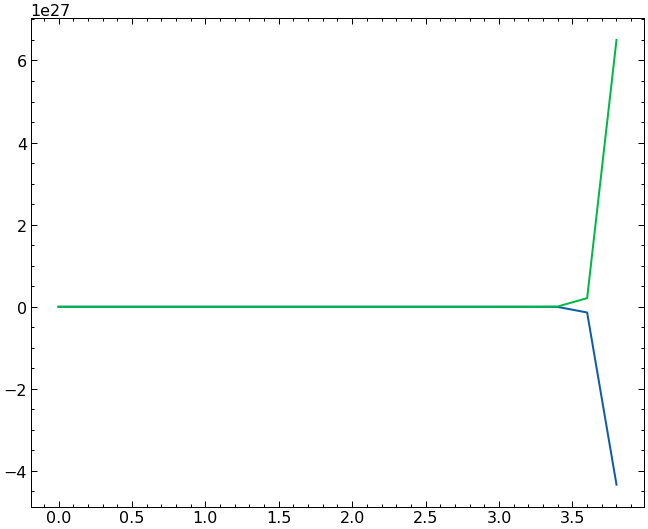

In [202]:
u,v,tiempo = runge_kutta_sistema(funcion_f, 0, 0.5)
ax = plt.figure(figsize=(11,9))
plt.plot(tiempo,u)
plt.plot(tiempo,v)

In [203]:
#3
def func3(x,y):
    xx = y
    yy =-2*x - 3*y
    return xx,yy

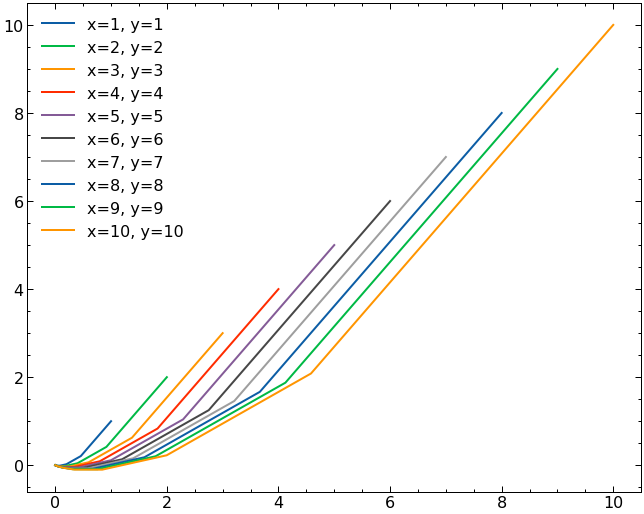

In [204]:
p = plt.figure(figsize=(11,9))
for x,y in [(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8),(9,9),(10,10)]:
    xc,yc,t = runge_kutta_sistema(func3, x, y)
    plt.plot(xc,yc, label='x={}, y={}'.format(x,y))
plt.legend()